In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import uniform
from scipy.stats import beta
from scipy.stats import gamma
from scipy.stats import binom


mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
fig_dpi      = 300
fig_typeface = 'Helvetica'
fig_family   = 'monospace'
fig_style    = 'normal'

## 3.a

In [2]:
x = np.linspace(0, 0.5, int(1e6))
p_uniform = uniform.pdf(x, loc=0.19, scale=0.35-0.19)
p_beta1 = beta.pdf(x, 10.2, 23.8)
p_beta2 = beta.pdf(x, 20.4, 47.6)

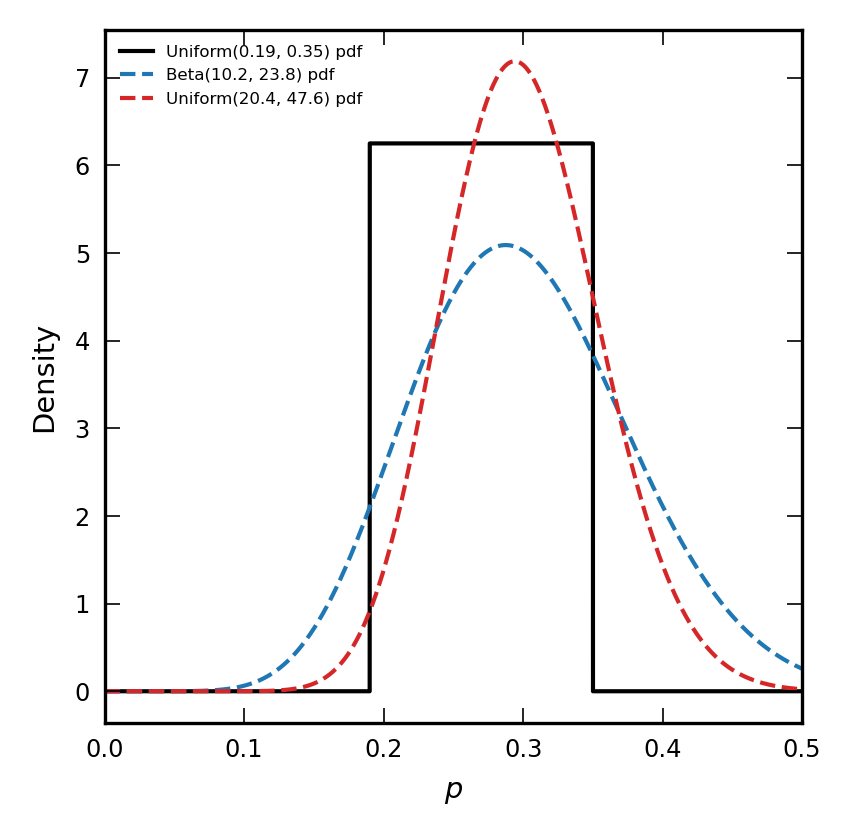

In [3]:
f, ax = plt.subplots(1, 1, figsize=(3, 3), facecolor='white', dpi=300, gridspec_kw={'hspace': 0., 'wspace': 0.})
ax.plot(x, p_uniform, color = "black",ls = '-', lw=1, label='Uniform(0.19, 0.35) pdf', zorder = 1)
ax.plot(x, p_beta1, color = "tab:blue",ls = '--', lw=1, label='Beta(10.2, 23.8) pdf', zorder = 1)
ax.plot(x, p_beta2, color = "tab:red",ls = '--', lw=1, label='Uniform(20.4, 47.6) pdf', zorder = 1)

ax.tick_params(axis='both', which='both', labelsize='xx-small', right=True, top=True, direction='in', width=.4)   
ax.set_xlabel(r"$p$", size='x-small')   
ax.set_ylabel("Density", size='x-small')
ax.set_xlim([0, 0.5])
ax.legend(loc = 2 ,fontsize = 4,markerscale = 3,ncol = 1,scatterpoints= 1,frameon = True,framealpha =0.).get_frame().set_linewidth(0.0)
plt.show()
# f.savefig("./HW4_3a.jpg", bbox_inches = "tight")

In [5]:
sample1 = np.random.beta(6, 36, int(1e8))
sample1 = sample1[sample1 >=0.19]
sample1 = sample1[sample1 <=0.35]
sample1 = np.random.choice(sample1, int(1e7))
sample2 = np.random.beta(15.2, 58.8, int(1e7))
sample3 = np.random.beta(25.4, 82.6, int(1e7))
sample1_mean = np.mean(sample1)
sample1_std = np.std(sample1)
sample1_prob = len(sample1[sample1>0.2])/int(1e7)
lb1 = np.percentile(sample1[sample1<sample1_mean], 5)
ub1 = np.percentile(sample1[sample1>=sample1_mean], 95)

sample2_mean = np.mean(sample2)
sample2_std = np.std(sample2)
sample2_prob = len(sample2[sample2>0.2])/int(1e7)
lb2 = np.percentile(sample2[sample2<sample2_mean], 5)
ub2 = np.percentile(sample2[sample2>=sample2_mean], 95)

sample3_mean = np.mean(sample3)
sample3_std = np.std(sample3)
sample3_prob = len(sample3[sample3>0.2])/int(1e7)
lb3 = np.percentile(sample3[sample3<sample3_mean], 5)
ub3 = np.percentile(sample3[sample3>=sample3_mean], 95)

/var/folders/dy/y_4bw3nj3nl7cw3b482fcf_c0000gn/T/ipykernel_56870/2603088003.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs1[0])


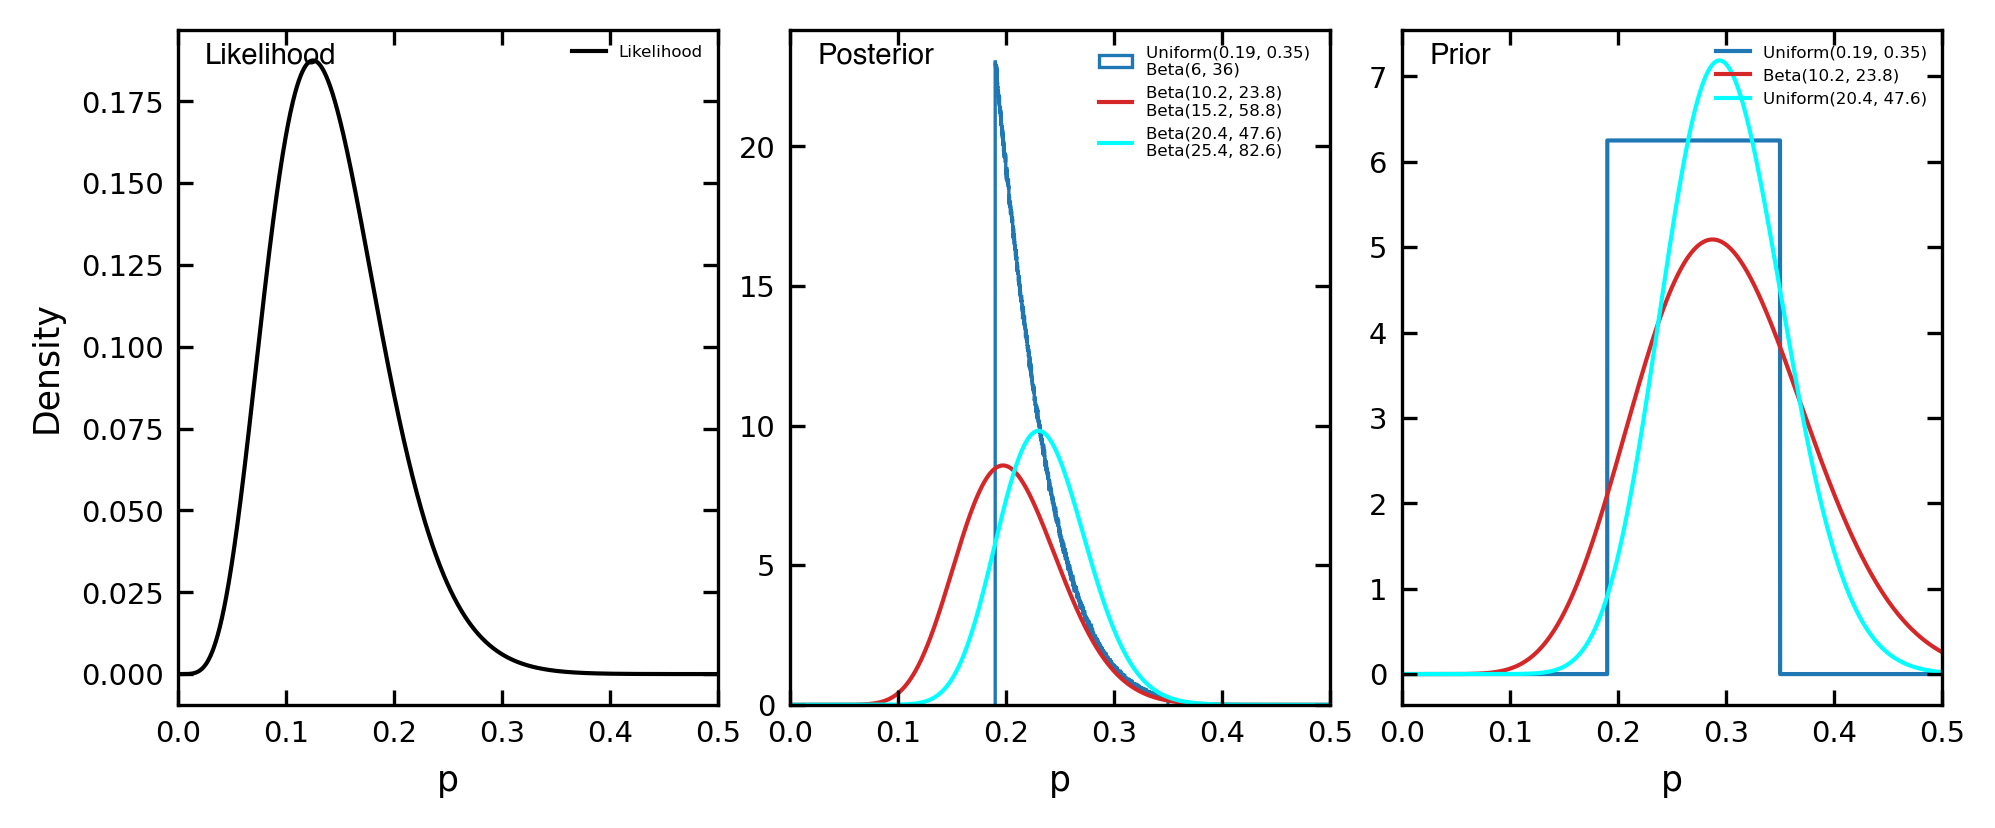

In [12]:
f,ax = plt.subplots(figsize=(6, 2.5), dpi=300)
gs1 = gridspec.GridSpec(1, 1)
gs1.update(left=0.01, right=0.31, bottom=0.05, top=0.95, hspace=0.1, wspace=0.)
ax1 = plt.subplot(gs1[0])


gs2 = gridspec.GridSpec(1, 1)
gs2.update(left=0.35, right=0.65, bottom=0.05, top=0.95, hspace=0.1, wspace=0.)
ax2 = plt.subplot(gs2[0])


gs3 = gridspec.GridSpec(1, 1)
gs3.update(left=0.69, right=0.99, bottom=0.05, top=0.95, hspace=0.1, wspace=0.)
ax3 = plt.subplot(gs3[0])

# Likelihood
ax1.plot(x, binom.pmf(5, 40, x), color = 'black',ls = "-", lw=1, label='Likelihood', zorder = 1)
# Posterior
ax2.hist(sample1, density= 1, bins=1000, histtype='step',lw= 0.8, color='tab:blue', alpha=1, zorder = 1,label = "Uniform(0.19, 0.35) \nBeta(6, 36)")
# ax2.plot(x, beta.pdf(x, 6, 36), color = 'tab:blue', ls = "-",lw=1, label='Uniform(0.19, 0.35) \nBeta(6, 36)', zorder = 1)
ax2.plot(x, beta.pdf(x, 15.2, 58.8), color = 'tab:red', ls = "-",lw=1, label='Beta(10.2, 23.8) \nBeta(15.2, 58.8)', zorder = 1)
ax2.plot(x, beta.pdf(x, 25.4, 82.6), color = 'cyan', ls = "-",lw=1, label='Beta(20.4, 47.6) \nBeta(25.4, 82.6)', zorder = 1)
# Prior
ax3.plot(x, p_uniform, color = "tab:blue",ls = '-', lw=1, label='Uniform(0.19, 0.35)', zorder = 1)
ax3.plot(x, p_beta1, color = "tab:red",ls = '-', lw=1, label='Beta(10.2, 23.8)', zorder = 1)
ax3.plot(x, p_beta2, color = "cyan",ls = '-', lw=1, label='Uniform(20.4, 47.6)', zorder = 1)

ax1.text(0.05, 0.95, "Likelihood", size=7, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax1.transAxes)
ax2.text(0.05, 0.95, "Posterior", size=7, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax2.transAxes)
ax3.text(0.05, 0.95, "Prior", size=7, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax3.transAxes)

ax1.set_xlim(0,0.5)
ax2.set_xlim(0,0.5)
ax3.set_xlim(0,0.5)
ax1.legend(loc = 1 ,fontsize = 4,markerscale = 3,ncol = 1,scatterpoints= 1,frameon = True,framealpha =0.).get_frame().set_linewidth(0.0)
ax2.legend(loc = 1 ,fontsize = 4,markerscale = 3,ncol = 1,scatterpoints= 1,frameon = True,framealpha =0.).get_frame().set_linewidth(0.0)
ax3.legend(loc = 1 ,fontsize = 4,markerscale = 3,ncol = 1,scatterpoints= 1,frameon = True,framealpha =0.).get_frame().set_linewidth(0.0)
ax1.tick_params(axis='both', which='both',labelleft = True, labelsize='x-small', right=True, top=True, direction='in')
ax2.tick_params(axis='both', which='both',labelleft = True, labelsize='x-small', right=True, top=True, direction='in')
ax3.tick_params(axis='both', which='both',labelleft = True, labelsize='x-small', right=True, top=True, direction='in')
   
ax1.set_xlabel('p', size='small'); ax2.set_xlabel('p', size='small');  ax3.set_xlabel('p', size='small')
ax1.set_ylabel('Density', size = "small")
# f.savefig("./HW4_3b.jpg", bbox_inches = "tight")
plt.show()


In [13]:
print("For the posterior of the Uniform(0.19, 0.35), the mean: %.3f, the std: %.3f, Pr(p>0.2) = %.3f"%(sample1_mean, sample1_std, sample1_prob))
print("For the posterior of the Beta(10.2, 23.8), the mean: %.3f, the std: %.3f, Pr(p>0.2) = %.3f"%(sample2_mean, sample2_std, sample2_prob))
print("For the posterior of the Beta(20.4, 47.6), the mean: %.3f, the std: %.3f, Pr(p>0.2) = %.3f"%(sample3_mean, sample3_std, sample3_prob))
print("95 percent HPDs for p are respectively: [%.3f, %.3f], [%.3f, %.3f], [%.3f, %.3f]"%(lb1,ub1, lb2,ub2, lb3, ub3))

For the posterior of the Uniform(0.19, 0.35), the mean: 0.226, the std: 0.031, Pr(p>0.2) = 0.789
For the posterior of the Beta(10.2, 23.8), the mean: 0.205, the std: 0.047, Pr(p>0.2) = 0.523
For the posterior of the Beta(20.4, 47.6), the mean: 0.235, the std: 0.041, Pr(p>0.2) = 0.803
95 percent HPDs for p are respectively: [0.191, 0.311], [0.123, 0.305], [0.161, 0.320]


## 4.a

In [89]:
x_ = np.linspace(0,6, int(1e7))
p_gamma_prior = gamma.pdf(x_, 2, loc=0, scale=1)
p_gamma_posterior = gamma.pdf(x_, 80, loc=0, scale=1/46)
pos_mode = x_[gamma.pdf(x_, 80, loc=0, scale=1/46)==np.max(p_gamma_posterior)]
pos_mean,pos_var = gamma.stats(80, loc=0, scale=1/46, moments="mv")

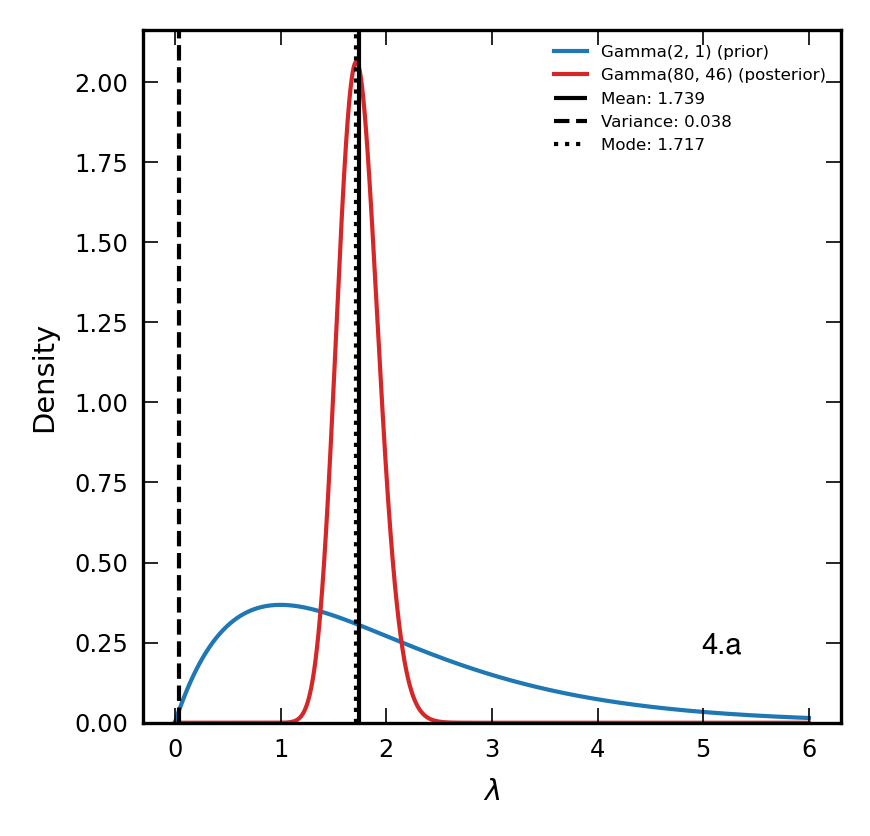

In [100]:
f, ax1 = plt.subplots(1, 1, figsize=(3, 3), facecolor='white', dpi=300, gridspec_kw={'hspace': 0., 'wspace': 0.})
ax1.plot(x_, p_gamma_prior, color = "tab:blue",ls = '-', lw=1, label='Gamma(2, 1) (prior)', zorder = 1)
ax1.plot(x_, p_gamma_posterior, color = "tab:red",ls = '-', lw=1, label='Gamma(80, 46) (posterior)', zorder = 1)
ax1.vlines(pos_mean, 0, np.max(p_gamma_posterior)+1, colors='black', linestyles='-', lw=1, label = "Mean: %.3f"%pos_mean, zorder = 1)
ax1.vlines(pos_var, 0, np.max(p_gamma_posterior)+1, colors='black', linestyles='--', lw=1, label = "Variance: %.3f"%pos_var, zorder = 1)
ax1.vlines(pos_mode, 0, np.max(p_gamma_posterior)+1, colors='black', linestyles=':', lw=1, label = "Mode: %.3f"%pos_mode, zorder = 1)


ax1.tick_params(axis='both', which='both', labelsize='xx-small', right=True, top=True, direction='in', width=.4)   
ax1.set_xlabel(r"$\lambda$", size='x-small')   
ax1.set_ylabel("Density", size='x-small')
# ax1.set_xlim([0, 6])
ax1.set_ylim([0, np.max(p_gamma_posterior)+0.1])
ax1.legend(loc = 1 ,fontsize = 4,markerscale = 3,ncol = 1,scatterpoints= 1,frameon = True,framealpha =0.).get_frame().set_linewidth(0.0)
ax1.text(0.8, 0.1, "4.a", size=7, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax1.transAxes)

plt.show()
# f.savefig("./HW4_4a.jpg", bbox_inches = "tight")

In [105]:
x_ = np.linspace(0,6, int(1e7))
p_gamma_prior = gamma.pdf(x_, 1/2, loc=0, scale=1)
p_gamma_posterior = gamma.pdf(x_, 78.5, loc=0, scale=1/45)
pos_mode = x_[gamma.pdf(x_, 78.5, loc=0, scale=1/45)==np.max(p_gamma_posterior)]
pos_mean,pos_var = gamma.stats(78.5, loc=0, scale=1/45, moments="mv")

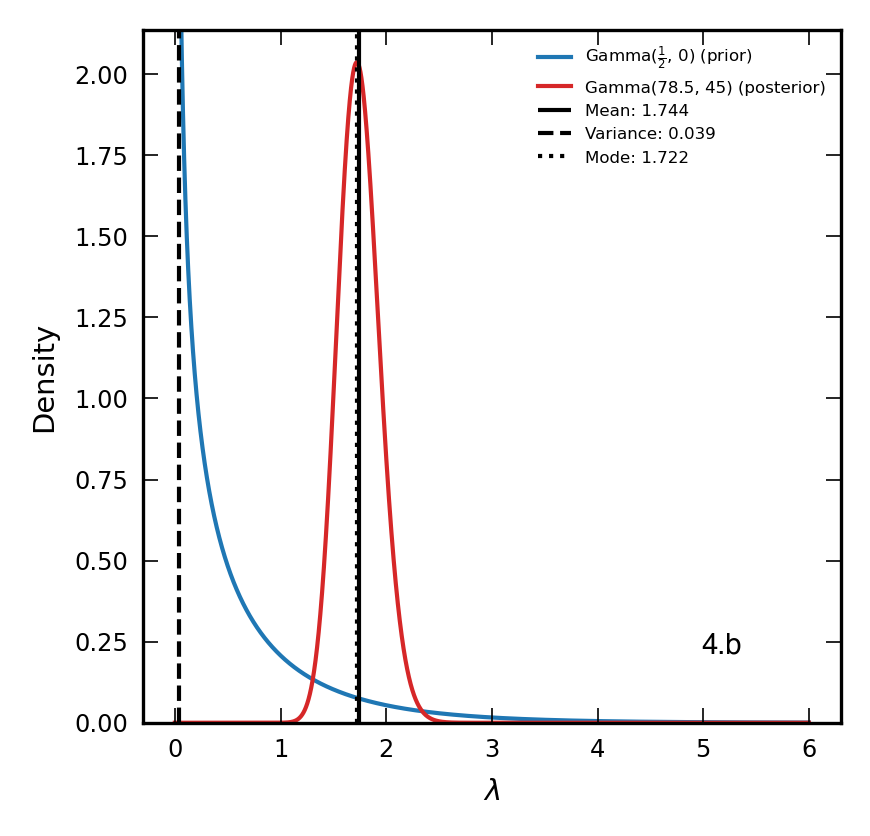

In [106]:
f, ax1 = plt.subplots(1, 1, figsize=(3, 3), facecolor='white', dpi=300, gridspec_kw={'hspace': 0., 'wspace': 0.})
ax1.plot(x_, p_gamma_prior, color = "tab:blue",ls = '-', lw=1, label=r'Gamma($\frac{1}{2}$, 0) (prior)', zorder = 1)
ax1.plot(x_, p_gamma_posterior, color = "tab:red",ls = '-', lw=1, label='Gamma(78.5, 45) (posterior)', zorder = 1)
ax1.vlines(pos_mean, 0, np.max(p_gamma_posterior)+1, colors='black', linestyles='-', lw=1, label = "Mean: %.3f"%pos_mean, zorder = 1)
ax1.vlines(pos_var, 0, np.max(p_gamma_posterior)+1, colors='black', linestyles='--', lw=1, label = "Variance: %.3f"%pos_var, zorder = 1)
ax1.vlines(pos_mode, 0, np.max(p_gamma_posterior)+1, colors='black', linestyles=':', lw=1, label = "Mode: %.3f"%pos_mode, zorder = 1)


ax1.tick_params(axis='both', which='both', labelsize='xx-small', right=True, top=True, direction='in', width=.4)   
ax1.set_xlabel(r"$\lambda$", size='x-small')   
ax1.set_ylabel("Density", size='x-small')
# ax1.set_xlim([0, 6])
ax1.set_ylim([0, np.max(p_gamma_posterior)+0.1])
ax1.legend(loc = 1 ,fontsize = 4,markerscale = 3,ncol = 1,scatterpoints= 1,frameon = True,framealpha =0.).get_frame().set_linewidth(0.0)
ax1.text(0.8, 0.1, "4.b", size=7, weight = 'bold',style=fig_style, family=fig_family, fontname=fig_typeface, transform=ax1.transAxes)

plt.show()
# f.savefig("./HW4_4b.jpg", bbox_inches = "tight")


In [ ]:
Initial = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8]
marks = ["o","^", "v", "<", ">", "*"]
figure, ax1 = plt.subplots(1, 1, figsize=(3, 3), facecolor='white', dpi=300, gridspec_kw={'hspace': 0., 'wspace': 0.})
for theta in Initial:
    j = 0
    i = 0
    convergence = []
    convergence.append(theta)
    while(i<10):
        f = math.factorial(197)/(math.factorial(125)*math.factorial(18)*math.factorial(20)*math.factorial(34))*(1/4)**197*(1-theta)**38*(2+theta)**125*theta**34
        logf = np.log(f)
        logf_prime = -38/(1-theta) + 125/(2+theta) + 34/theta
        theta = theta - logf/(logf_prime)
        convergence.append(theta)
        i = i + 1
    ax.plot(np.arange(11), convergence, marks[j], ms = 1)
    j = j + 1
    
    